<a href="https://colab.research.google.com/github/LeeDongN/Medica_AI2/blob/main/final_data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
import os
import sklearn
from google.colab import drive
from scipy.signal import find_peaks
drive.mount('/content/drive')
path = '/content/drive/My Drive/data/'

Mounted at /content/drive


# first data import

In [2]:
first_data = []
first_data = pd.read_csv('/content/drive/My Drive/data2/REF.CSV', skiprows=24)
first_data_origin = pd.read_csv('/content/drive/My Drive/data2/REF.CSV', skiprows=24)
first_a = float(first_data_origin.columns[0])
first_b = float(first_data_origin.columns[1])
first_data.loc[0] = [first_a, first_b]
first_data.columns=['Wave_length', 'Amplitude']
first_data['label']=1.3
first_np = first_data[['Wave_length', 'Amplitude']].to_numpy()
first_np = np.ravel(first_np, order='F')
first_np = np.array([first_np])

# label

In [ ]:
first_np[0]

array([1.4750000e+03, 1.4750397e+03, 1.4750595e+03, ..., 1.3470000e-06,
       1.2690000e-06, 1.4060000e-06])

# functions

#### importing first data function

In [4]:
def first_data_import():
  # import the first_data
  # first_data making
  first_data = []
  first_data = pd.read_csv('/content/drive/My Drive/data2/REF.CSV', skiprows=24)
  first_data_origin = pd.read_csv('/content/drive/My Drive/data2/REF.CSV', skiprows=24)
  first_a = float(first_data_origin.columns[0])
  first_b = float(first_data_origin.columns[1])
  first_data.loc[0] = [first_a, first_b]
  first_data.columns=['Wave_length', 'Amplitude']
  first_data['label']=1.3
  first_np = first_data[['Wave_length', 'Amplitude']].to_numpy()
  first_np = np.ravel(first_np, order='F')
  first_np = np.array([first_np])

  return first_data, first_np

#### importing whole data and stack function

In [5]:
def stack_data(path):
  # the array that combined whole data
  stack_np = np.array([[]])
  # extract the folder name (it will be the label)
  folder_list = os.listdir(path)
  # extract each folder name
  for folder_name in folder_list:
    temp_folder_list = os.listdir(path + folder_name)
    # extract each file name
    for file_name in temp_folder_list:
      # Read the data into a Pandas DataFrame
      data = pd.read_csv(path + folder_name + '/' + file_name, skiprows=24)
      data_origin = pd.read_csv(path + folder_name + '/' + file_name, skiprows=24)
      # generate columns name and restore the removed data(the first data)
      a = float(data_origin.columns[0])
      b = float(data_origin.columns[1])
      data.loc[0] = [a, b]
      data.columns=['Wave_length', 'Amplitude']
      # make the pandas data to numpy
      temp = data[['Wave_length', 'Amplitude']].to_numpy()
      # make it flat
      temp = np.ravel(temp, order='F')
      temp = np.array([temp])
      stack_np = np.concatenate((first_np, temp), axis = 1)
  return stack_np

#### removing DC function

In [6]:
# Implementing a simple DC removal function
def remove_dc(signal):
    # Calculate the mean of the signal
    signal_mean = np.mean(signal)
    # Remove the mean from the signal
    dc_removed_signal = signal - signal_mean
    return dc_removed_signal

#### finding peaks function

In [7]:
# Find peaks
def detect_peaks(signal, threshold=None, min_distance=1, prominence=None):
    if threshold is None:
        # Set threshold as a percentage of the maximum peak
        max_peak = np.max(signal)
    peaks, _ = find_peaks(signal, height=threshold, distance=min_distance, prominence=prominence)
    return peaks

#### peak values extracting function

In [8]:
def extract_peaks(X, Y, peak_range):
  # pandas to numpy
  peak_X = X.to_numpy()
  peak_Y = Y.to_numpy()
  # extract the peak value index
  index = list(peak_Y).index(max(peak_Y))

  # temp saving
  extracted_x = []
  extracted_y = []

  # extract the values from highest peak, and surrounding peaks
  for k in range(peak_range):
    # index labeling
    i = k + 1
    p_temp_index = index + i
    m_temp_index = index - i
    # extract y
    extracted_y.append(peak_Y[p_temp_index])
    extracted_y.append(peak_Y[m_temp_index])
    # extract X
    extracted_x.append(peak_X[p_temp_index])
    extracted_x.append(peak_X[m_temp_index])

  # extrack the center(highest) value
  extracted_x.append(peak_X[index])
  extracted_y.append(peak_Y[index])

  return extracted_x, extracted_y

#### final function

In [31]:
def final_function(path):
  # extracted peak amplitudes and wavelength array
  extracted_Wavelength = []
  extracted_Amplitude = []
  print(extracted_Wavelength)
  # the array that combined whole data
  stack_np = np.array([[]])
  # extract the folder name (it will be the label)
  folder_list = os.listdir(path)
  # extract each folder name
  for folder_name in folder_list:
    temp_folder_list = os.listdir(path + folder_name)
    # extract each file name
    for file_name in temp_folder_list:
      # Read the data into a Pandas DataFrame
      data = pd.read_csv(path + folder_name + '/' + file_name, skiprows=24)
      data_origin = pd.read_csv(path + folder_name + '/' + file_name, skiprows=24)
      # generate columns name and restore the removed data(the first data)
      a = float(data_origin.columns[0])
      b = float(data_origin.columns[1])
      data.loc[0] = [a, b]
      data.columns=['Wave_length', 'Amplitude']

      # DC removed
      dc_removed_Y = remove_dc(data['Amplitude'])

      # dececting peaks
      min_distance = 100  # Set the minimum distance between peaks
      local_maxima_indices = detect_peaks(dc_removed_Y, min_distance=min_distance)
      local_maxima_x = data['Wave_length'][local_maxima_indices]
      local_maxima_y = dc_removed_Y[local_maxima_indices]

      # extract_peaks
      extracted_x, extracted_y = extract_peaks(local_maxima_x, local_maxima_y, 2)
      # saving
      extracted_Wavelength.append(extracted_x)
      print(extracted_Wavelength)
      extracted_Amplitude.append(extracted_y)

  #return stack_np

# Test

In [32]:
final_function(path)

[]
[[1546.8056, 1540.2381, 1549.9802, 1537.1032, 1543.5516]]
[[1546.8056, 1540.2381, 1549.9802, 1537.1032, 1543.5516], [1546.8254, 1540.2579, 1550.1389, 1537.1627, 1543.5913]]
[[1546.8056, 1540.2381, 1549.9802, 1537.1032, 1543.5516], [1546.8254, 1540.2579, 1550.1389, 1537.1627, 1543.5913], [1546.8452, 1540.5357, 1550.2183, 1537.1825, 1543.7103]]
[[1546.8056, 1540.2381, 1549.9802, 1537.1032, 1543.5516], [1546.8254, 1540.2579, 1550.1389, 1537.1627, 1543.5913], [1546.8452, 1540.5357, 1550.2183, 1537.1825, 1543.7103], [1546.2698, 1539.881, 1549.6032, 1536.627, 1543.2143]]
[[1546.8056, 1540.2381, 1549.9802, 1537.1032, 1543.5516], [1546.8254, 1540.2579, 1550.1389, 1537.1627, 1543.5913], [1546.8452, 1540.5357, 1550.2183, 1537.1825, 1543.7103], [1546.2698, 1539.881, 1549.6032, 1536.627, 1543.2143], [1546.5079, 1539.9206, 1549.881, 1536.8452, 1543.2937]]
[[1546.8056, 1540.2381, 1549.9802, 1537.1032, 1543.5516], [1546.8254, 1540.2579, 1550.1389, 1537.1627, 1543.5913], [1546.8452, 1540.5357, 1550

## Application

In [ ]:
dc_removed_Y = remove_dc(first_data['Amplitude'])

In [ ]:
# Apply peak detection with dynamic threshold
min_distance = 100  # Set the minimum distance between peaks
local_maxima_indices, threshold = detect_peaks(dc_removed_Y, min_distance=min_distance)
local_maxima_x = first_data['Wave_length'][local_maxima_indices]
local_maxima_y = dc_removed_Y[local_maxima_indices]

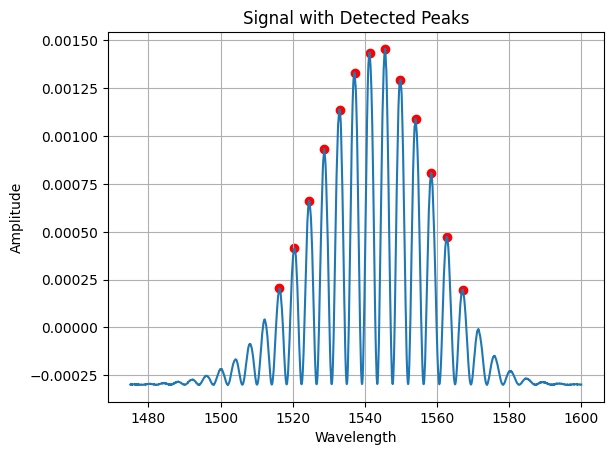

Threshold: 0.00014555347266804764
Number of peaks: 13


In [ ]:
# Plot the signal with detected peaks
plt.plot(first_data['Wave_length'], dc_removed_Y)
plt.scatter(local_maxima_x, local_maxima_y, color='red')
plt.xlabel('Wavelength')
plt.ylabel('Amplitude')
plt.title('Signal with Detected Peaks')
plt.grid(True)
plt.show()
print("Threshold:", threshold)
num_peaks = len(local_maxima_indices)
print("Number of peaks:", num_peaks)

In [ ]:
first_data['Wave_length']

0       1475.0000
1       1475.0397
2       1475.0595
3       1475.0794
4       1475.0992
          ...    
6295    1599.9206
6296    1599.9405
6297    1599.9603
6298    1599.9802
6299    1600.0000
Name: Wave_length, Length: 6300, dtype: float64
